In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# URL of the Heart Disease Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"


In [3]:
# Load the dataset into a DataFrame
heart_data = pd.read_csv(url, header=None, names=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"], na_values="?")


In [4]:
# Display the first few rows of the DataFrame
print(heart_data.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  


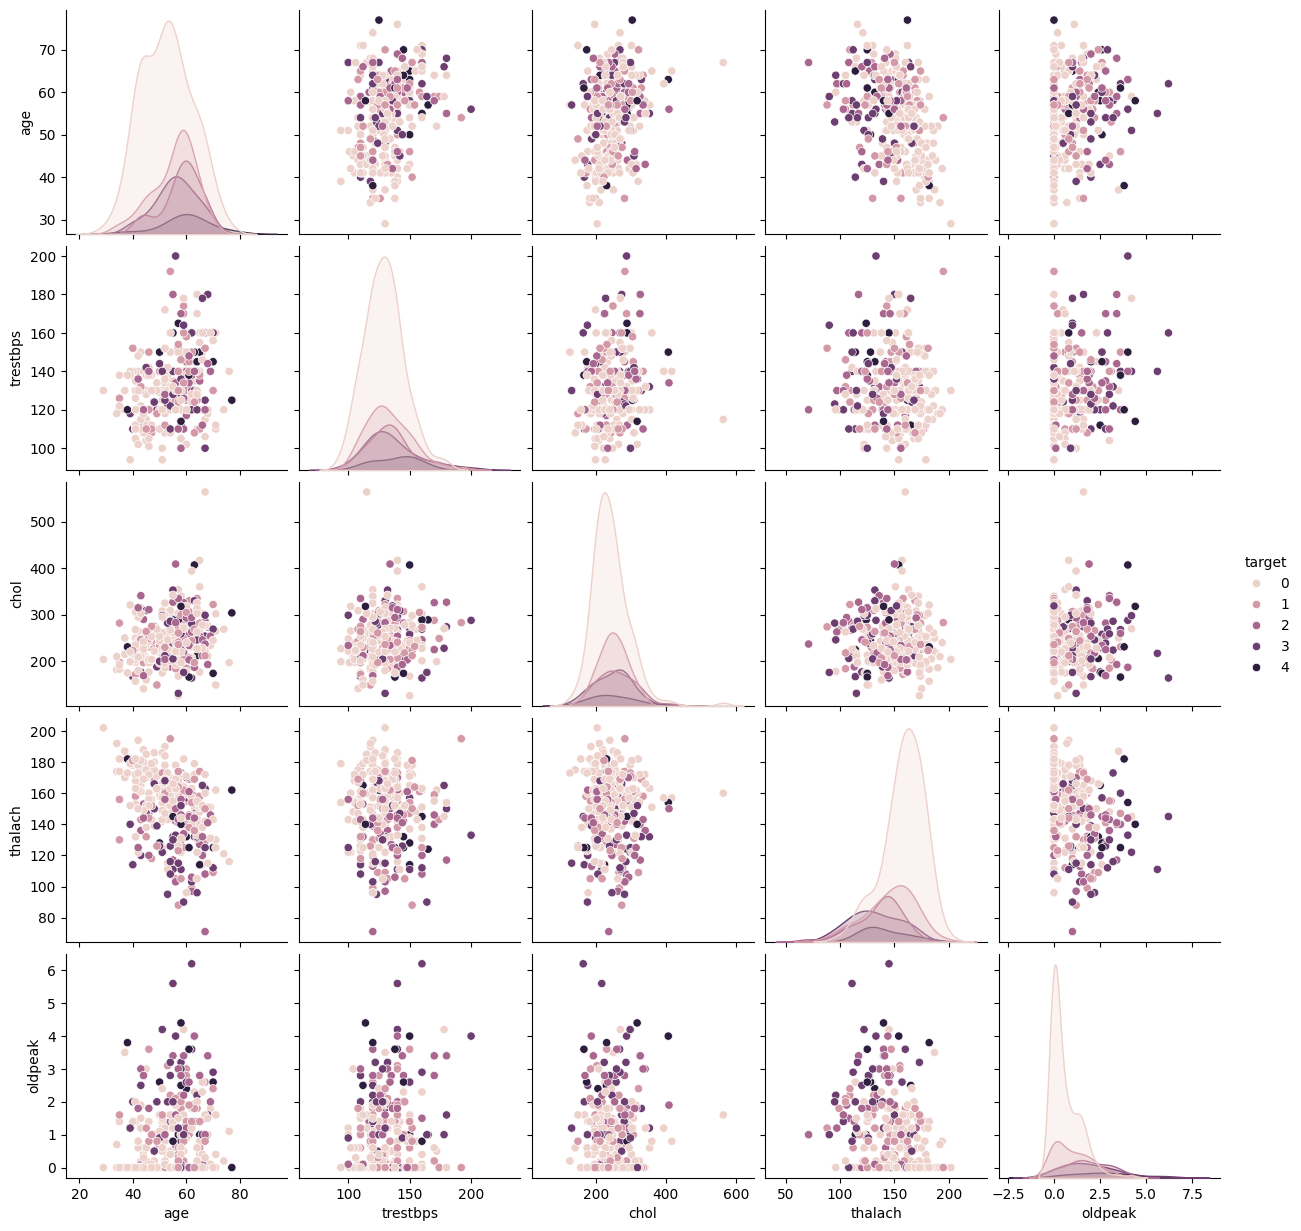

In [5]:
# Pairplot for selected features
selected_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
sns.pairplot(heart_data[selected_features + ["target"]], hue="target", diag_kind="kde")
plt.show()

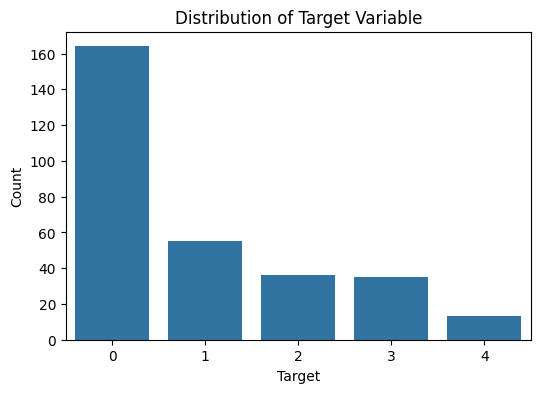

In [6]:
# Bar chart for the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=heart_data)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [7]:
# Drop rows with missing values
heart_data = heart_data.dropna()

# Split the data into features (X) and target variable (y)
X = heart_data.drop("target", axis=1)
y = heart_data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Initialize the SVM model
svm_model = SVC(kernel="linear", C=1)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.62


In [11]:
# Display additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        36
           1       0.00      0.00      0.00         9
           2       0.40      0.40      0.40         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.62        60
   macro avg       0.24      0.27      0.25        60
weighted avg       0.50      0.62      0.55        60



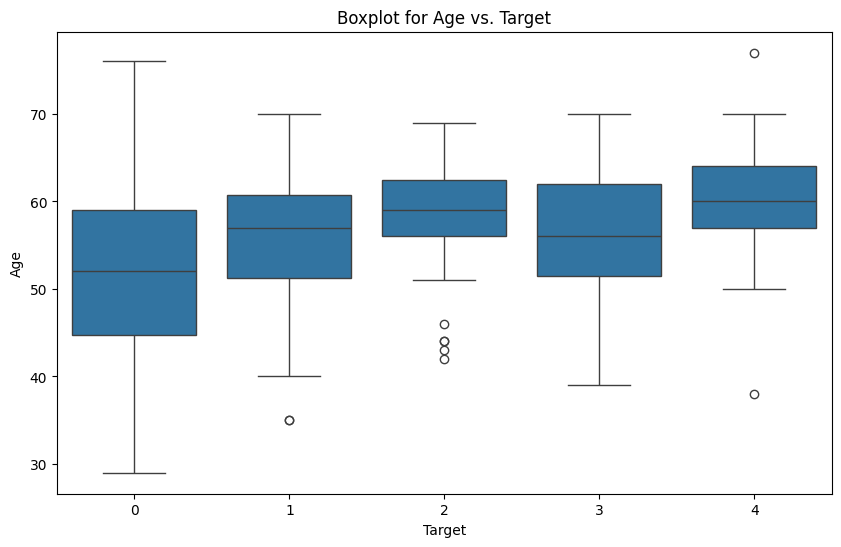

In [10]:
# Boxplot for age vs. target
plt.figure(figsize=(10, 6))
sns.boxplot(x="target", y="age", data=heart_data)
plt.xlabel("Target")
plt.ylabel("Age")
plt.title("Boxplot for Age vs. Target")
plt.show()